In [9]:
!pip install polars[all]
!pip install seaborn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 21.5/21.5 MB 43.7 MB/s eta 0:00:00
     --------------------------------------- 41.3/41.3 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 341.8/341.8 kB ? eta 0:00:00
     --------------------------------------- 19.8/19.8 MB 43.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [24]:
pip install pyarrow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import polars as pl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

from polars import Boolean
from polars import UInt8
from polars import UInt16
from polars import UInt32
from polars import Float32
from polars import Utf8
from polars import selectors as cs


In [43]:
def show_nulls_detail(data):
    return data \
        .null_count() \
        .sum() \
        .transpose() \
        .with_columns(pl.Series(name="name", values=data.columns)) \
        .filter(pl.col("column_0") > 0) \
        .select(pl.col("name"), pl.col("column_0").alias("nulls"))


def show_correlogram(data):
    numeric_columns = data.select(cs.numeric())
    corr = numeric_columns.to_pandas().corr()
    mask = np.triu(corr)
    sns.set(rc={"figure.figsize": (20, 10)})
    sns.heatmap(corr, annot=True, fmt='.2f', 
                # mask=mask,
                vmin=-1, vmax=1, center=0, cmap='coolwarm')

def eta_squared(x, y):
    y_mean = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-y_mean)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-y_mean)**2 for c in classes])
    return SCE/SCT
 



In [44]:
data_2016 = pl.scan_csv(source="data/2016_Building_Energy_Benchmarking.csv",
                        dtypes={
                            'OSEBuildingID': UInt32,
                            'DataYear': UInt16,
                            'BuildingType': Utf8,
                            'PrimaryPropertyType': Utf8,
                            'PropertyName': Utf8,
                            'Address': Utf8,
                            'City': Utf8,
                            'State': Utf8,
                            'ZipCode': Utf8,
                            'TaxParcelIdentificationNumber': Utf8,
                            'CouncilDistrictCode': UInt8,
                            'Neighborhood': Utf8,
                            'Latitude': Float32,
                            'Longitude': Float32,
                            'YearBuilt': UInt16,
                            'NumberofBuildings': UInt8,
                            'NumberofFloors': UInt8,
                            'PropertyGFATotal': UInt32,
                            'PropertyGFAParking': UInt32,
                            'PropertyGFABuilding(s)': UInt32,
                            'ListOfAllPropertyUseTypes': Utf8,
                            'LargestPropertyUseType': Utf8,
                            'LargestPropertyUseTypeGFA': Float32,
                            'SecondLargestPropertyUseType': Utf8,
                            'SecondLargestPropertyUseTypeGFA': Float32,
                            'ThirdLargestPropertyUseType': Utf8,
                            'ThirdLargestPropertyUseTypeGFA': Float32,
                            'YearsENERGYSTARCertified': Utf8,
                            'ENERGYSTARScore': Utf8,
                            'SiteEUI(kBtu/sf)': Float32,
                            'SiteEUIWN(kBtu/sf)': Float32,
                            'SourceEUI(kBtu/sf)': Float32,
                            'SourceEUIWN(kBtu/sf)': Float32,
                            'SiteEnergyUse(kBtu)': Float32,
                            'SiteEnergyUseWN(kBtu)': Float32,
                            'SteamUse(kBtu)': Float32,
                            'Electricity(kWh)': Float32,
                            'Electricity(kBtu)': Float32,
                            'NaturalGas(therms)': Float32,
                            'NaturalGas(kBtu)': Float32,
                            'DefaultData': Boolean,
                            'Comments': Utf8,
                            'ComplianceStatus': Utf8,
                            'Outlier': Utf8,
                            'TotalGHGEmissions': Float32,
                            'GHGEmissionsIntensity': Float32
                        }) \
    .with_columns((pl
                   .when(pl.col("ENERGYSTARScore") == None).then(None)
                   .otherwise(pl.col("ENERGYSTARScore").str.parse_int(radix=10, strict=False))
                   ).alias("ENERGYSTARScore")) \
    .collect()

data_2016.describe()


describe,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
str,f64,f64,str,str,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64
"""count""",3376.0,3376.0,"""3376""","""3376""","""3376""","""3376""","""3376""","""3376""","""3376""","""3376""",3376.0,"""3376""",3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,"""3376""","""3376""",3376.0,"""3376""",3376.0,"""3376""",3376.0,"""3376""",3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,3376.0,"""3376""","""3376""","""3376""",3376.0,3376.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""16""","""0""",0.0,"""0""",0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,"""9""","""9""",20.0,"""1686""",1697.0,"""2769""",2780.0,"""3257""",843.0,7.0,6.0,9.0,9.0,5.0,6.0,9.0,9.0,9.0,9.0,9.0,0.0,"""3376""","""0""","""3344""",9.0,9.0
"""mean""",21208.991114,2016.0,null,null,null,null,null,null,null,null,4.439277,null,47.624035,-122.334793,1968.573164,1.106888,4.709123,94833.537322,8001.526066,86832.011256,null,null,79177.640625,null,28444.076172,null,11738.674805,null,67.918674,54.732117,57.033798,134.232849,137.783936,5403667.5,5276725.5,274595.90625,1.086639e6,3.7076e6,13685.044922,1368504.5,0.033472,null,null,null,119.723969,1.175916
"""std""",12223.757015,0.0,null,null,null,null,null,null,null,null,2.120625,null,0.047758,0.027203,33.088156,2.108402,5.494465,218837.60712,32326.723928,207939.811923,null,null,201703.40625,null,54392.917969,null,29331.201172,null,26.873271,56.273125,57.16333,139.287552,139.109802,2.1610628e7,1.5938785e7,3912172.5,4.352478e6,1.4850657e7,67097.882812,6.709778e6,0.179891,null,null,null,538.832214,1.821452
"""min""",1.0,2016.0,"""Campus""","""Distribution C…","""#4706 Bitterla…","""(ID23682) 3204…","""Seattle""","""WA""","""98006""","""0000000000""",1.0,"""BALLARD""",47.499168,-122.414253,1900.0,0.0,0.0,11285.0,0.0,3636.0,"""Adult Educatio…","""Adult Educatio…",5656.0,"""Adult Educatio…",0.0,"""Bank Branch""",0.0,"""2007""",1.0,0.0,0.0,0.0,-2.1,0.0,0.0,0.0,-33826.800781,-115417.0,0.0,0.0,0.0,null,"""Compliant""","""High outlier""",-0.8,-0.02
"""max""",50226.0,2016.0,"""SPS-District K…","""Worship Facili…","""westwinds""","""Readiness Cent…","""Seattle""","""WA""","""98272""","""9835200050""",7.0,"""SOUTHWEST""",47.733871,-122.220963,2015.0,111.0,99.0,9.320156e6,512608.0,9.320156e6,"""Worship Facili…","""Worship Facili…",9.320156e6,"""Worship Facili…",686750.0,"""Worship Facili…",459748.0,"""20172016201520…",100.0,834.400024,834.400024,2620.0,2620.0,8.73923712e8,4.71613856e8,1.34943456e8,1.92577488e8,6.57074368e8,2.97909e6,2.97908992e8,1.0,null,"""Non-Compliant""","""Low outlier""",16870.980469,34.09
"""median""",23112.0,2016.0,null,null,null,null,null,null,null,null,4.0,null,47.618675,-122.332489,1975.0,1.0,4.0,44175.0,0.0,43216.0,null,null,39894.0,null,10664.0,null,5043.0,null,75.0,38.599998,40.900002,96.199997,101.099998,1.8038e6,1.904452e6,0.0,345129.90625,1.177583e6,3237.537598,323754.0,0.0,null,null,null,33.919998,0.61
"""25%""",19991.0,2016.0,null,null,null,null,null,null,null,null,3.0,null,47.599861,-122.350662,1948.0,1.0,2.0,28492.0,0.0,27760.0,null,nul

In [45]:
show_nulls_detail(data_2016)


name,nulls
str,u32
"""ZipCode""",16
"""NumberofBuildi…",8
"""ListOfAllPrope…",9
"""LargestPropert…",9
"""LargestPropert…",20
"""SecondLargestP…",1686
"""SecondLargestP…",1697
"""ThirdLargestPr…",2769
"""ThirdLargestPr…",2780


In [46]:
data_filtered = data_2016 \
    .with_columns(
        pl.when((pl.col("SecondLargestPropertyUseType").is_null()) &
                (pl.col("SecondLargestPropertyUseTypeGFA").is_null()))
        .then(pl.lit(0))
        .otherwise(pl.col("SecondLargestPropertyUseTypeGFA"))
        .alias("SecondLargestPropertyUseTypeGFA")
    ) \
    .with_columns(
        pl.when((pl.col("ThirdLargestPropertyUseType").is_null()) &
                (pl.col("ThirdLargestPropertyUseTypeGFA").is_null()))
        .then(pl.lit(0))
        .otherwise(pl.col("ThirdLargestPropertyUseTypeGFA"))
        .alias("ThirdLargestPropertyUseTypeGFA")
    ) \
    .with_columns(pl.when(pl.col("NumberofBuildings") > 0).then(pl.col("NumberofBuildings")).otherwise(pl.lit(1)).alias("NumberofBuildings")) \
    .with_columns(pl.when(pl.col("NumberofFloors") > 0).then(pl.col("NumberofFloors")).otherwise(pl.lit(1)).alias("NumberofFloors")) \
    .filter(pl.col("LargestPropertyUseTypeGFA").is_not_null()) \
    .filter(pl.col("SecondLargestPropertyUseTypeGFA").is_not_null()) \
    .filter(pl.col("ThirdLargestPropertyUseTypeGFA").is_not_null()) \
    .filter(pl.col("SiteEUI(kBtu/sf)").is_not_null()) \
    .filter(pl.col("SiteEUIWN(kBtu/sf)").is_not_null()) \
    .filter(pl.col("SiteEnergyUseWN(kBtu)").is_not_null()) \
    .filter(pl.col("ZipCode").is_not_null()) \
    .filter(pl.col("BuildingType").str.to_uppercase().str.starts_with("NONRESIDENTIAL")) \
    .filter(pl.col("SiteEnergyUse(kBtu)").is_between(pl.col("SiteEnergyUse(kBtu)").quantile(0.005), pl.col("SiteEnergyUse(kBtu)").quantile(0.995))) \
    .filter(pl.col("Electricity(kBtu)").is_between(pl.col("Electricity(kBtu)").quantile(0.005), pl.col("Electricity(kBtu)").quantile(0.995))) \
    .filter(pl.col("SteamUse(kBtu)").is_between(pl.col("SteamUse(kBtu)").quantile(0.005), pl.col("SteamUse(kBtu)").quantile(0.995))) \
    .filter(pl.col("NaturalGas(kBtu)").is_between(pl.col("NaturalGas(kBtu)").quantile(0.005), pl.col("NaturalGas(kBtu)").quantile(0.995))) \
    .filter(pl.col("PropertyGFATotal").is_between(pl.col("PropertyGFATotal").quantile(0.005), pl.col("PropertyGFATotal").quantile(0.995))) \
    .filter(pl.col("PropertyGFAParking").is_between(pl.col("PropertyGFAParking").quantile(0.005), pl.col("PropertyGFAParking").quantile(0.995))) \
    .filter(pl.col("PropertyGFABuilding(s)").is_between(pl.col("PropertyGFABuilding(s)").quantile(0.005), pl.col("PropertyGFABuilding(s)").quantile(0.995))) \
    .filter(pl.col("LargestPropertyUseTypeGFA").is_between(pl.col("LargestPropertyUseTypeGFA").quantile(0.005), pl.col("LargestPropertyUseTypeGFA").quantile(0.995))) \
    .filter(pl.col("SecondLargestPropertyUseTypeGFA").is_between(pl.col("SecondLargestPropertyUseTypeGFA").quantile(0.005), pl.col("SecondLargestPropertyUseTypeGFA").quantile(0.995))) \
    .filter(pl.col("SiteEUI(kBtu/sf)").is_between(pl.col("SiteEUI(kBtu/sf)").quantile(0.005), pl.col("SiteEUI(kBtu/sf)").quantile(0.995))) \
    .filter(pl.col("SiteEUIWN(kBtu/sf)").is_between(pl.col("SiteEUIWN(kBtu/sf)").quantile(0.005), pl.col("SiteEUIWN(kBtu/sf)").quantile(0.995))) \
    .filter(pl.col("SourceEUI(kBtu/sf)").is_between(pl.col("SourceEUI(kBtu/sf)").quantile(0.005), pl.col("SourceEUI(kBtu/sf)").quantile(0.995))) \
    .filter(pl.col("SourceEUIWN(kBtu/sf)").is_between(pl.col("SourceEUIWN(kBtu/sf)").quantile(0.005), pl.col("SourceEUIWN(kBtu/sf)").quantile(0.995))) \
    .filter(pl.col("SiteEnergyUseWN(kBtu)").is_between(pl.col("SiteEnergyUseWN(kBtu)").quantile(0.005), pl.col("SiteEnergyUseWN(kBtu)").quantile(0.995))) \
    .filter(pl.col("Electricity(kWh)").is_between(pl.col("Electricity(kWh)").quantile(0.005), pl.col("Electricity(kWh)").quantile(0.995))) \
    .filter(pl.col("NaturalGas(therms)").is_between(pl.col("NaturalGas(therms)").quantile(0.005), pl.col("NaturalGas(therms)").quantile(0.995))) \
    .with_columns(pl.col("Neighborhood").str.to_uppercase()) \
    .with_columns(pl.col("SecondLargestPropertyUseType").fill_null(pl.lit("NOT USED"))) \
    .with_columns(pl.col("ThirdLargestPropertyUseType").fill_null(pl.lit("NOT USED"))) \
    .with_columns((pl.col("SteamUse(kBtu)") / pl.col("SiteEnergyUse(kBtu)")).alias("SteamUse(percent)")) \
    .with_columns((pl.col("Electricity(kBtu)") / pl.col("SiteEnergyUse(kBtu)")).alias("Electricity(percent)")) \
    .with_columns((pl.col("NaturalGas(kBtu)") / pl.col("SiteEnergyUse(kBtu)")).alias("NaturalGas(percent)")) \
    .filter(pl.col("SteamUse(percent)") + pl.col("Electricity(percent)") + pl.col("NaturalGas(percent)") <= 1.001) \
    .drop(["City", "Comments", "Outlier"])


data_filtered.describe()

describe,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SteamUse(percent),Electricity(percent),NaturalGas(percent)
str,f64,f64,str,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64
"""count""",1358.0,1358.0,"""1358""","""1358""","""1358""","""1358""","""1358""","""1358""","""1358""",1358.0,"""1358""",1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,"""1358""","""1358""",1358.0,"""1358""",1358.0,"""1358""",1358.0,"""1358""",1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,"""1358""",1358.0,1358.0,1358.0,1358.0,1358.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,"""0""",0.0,"""1287""",456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",16514.962445,2016.0,null,null,null,null,null,null,null,4.351988,null,47.615574,-122.333191,1960.121502,1.048601,3.630339,82461.298233,9767.541973,72693.756259,null,null,66718.796875,null,12658.420898,null,1663.835205,null,63.691796,64.898598,67.438583,160.726944,163.514954,4620555.5,4.730141e6,190183.5625,976598.125,3.3322e6,10822.197266,1.0822e6,0.006627,null,95.386383,1.38447,0.021522,0.709375,0.267481
"""std""",13178.957716,0.0,null,null,null,null,null,null,null,2.190915,null,0.047449,0.022996,32.609873,0.399698,4.787945,93415.239168,29081.136625,78888.374882,null,null,72631.359375,null,26818.240234,null,5589.97168,null,28.294635,49.287575,50.557243,120.12294,120.614723,5429319.5,5.475046e6,1.051223e6,1.2623e6,4307069.5,17945.193359,1.7945e6,0.081168,null,136.606613,1.603237,0.092515,0.262199,0.262171
"""min""",1.0,2016.0,"""NonResidential…","""Distribution C…","""#4706 Bitterla…","""100 23RD AVE S…","""WA""","""98006""","""0001800033""",1.0,"""BALLARD""",47.50959,-122.411819,1900.0,1.0,1.0,20088.0,0.0,17956.0,"""Adult Educatio…","""Adult Educatio…",8223.0,"""Adult Educatio…",0.0,"""Bank Branch""",0.0,"""2007""",1.0,4.4,0.0,13.9,0.0,106918.0,0.0,0.0,31335.900391,106918.0,0.0,0.0,0.0,"""Compliant""",0.75,0.03,0.0,0.084121,0.0
"""max""",50101.0,2016.0,"""Nonresidential…","""Worship Facili…","""property #50""","""Readiness Cent…","""WA""","""98199""","""9834201515""",7.0,"""SOUTHWEST""",47.733871,-122.261803,2015.0,8.0,99.0,706176.0,206597.0,706176.0,"""Worship Facili…","""Worship Facili…",564258.0,"""Worship Facili…",197750.0,"""Vocational Sch…",84051.898438,"""20172016201520…",100.0,309.0,313.700012,695.299988,697.5,3.702218e7,3.8977108e7,1.3556219e7,7.796691e6,2.660231e7,126254.601562,1.262546e7,1.0,"""Non-Compliant""",1280.810059,14.94,0.766987,1.000003,0.915879
"""median""",21237.5,2016.0,null,null,null,null,null,null,null,4.0,null,47.612331,-122.332817,1964.0,1.0,2.0,45746.5,0.0,43855.0,null,null,40120.5,null,0.0,null,0.0,null,70.0,52.299999,54.5,132.600006,135.949997,2456425.5,2.565916e6,0.0,456737.9375,1.55839e6,3986.659912,398666.0,0.0,null,45.095001,0.805,0.0,0.72522,0.221134
"""25%""",629.0,2016.0,null,null,null,null,null,null,null,2.0,null,47.58482,-122.342682,1929.0,1.0,1.0,28800.0,0.0,27838.0,null,null,24990.0,null,0.0,null,0.0,null,46.0,34.0,

In [47]:
show_nulls_detail(data_filtered)

name,nulls
str,u32
"""YearsENERGYSTA…",1287
"""ENERGYSTARScor…",456


In [49]:
categorical_columns = [
    'BuildingType',
    'PrimaryPropertyType',
    'ZipCode',
    'Neighborhood',
    'LargestPropertyUseType',
    'SecondLargestPropertyUseType',
    'ThirdLargestPropertyUseType'
]

target_columns = [
    "SiteEnergyUse(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "SteamUse(percent)",
    "Electricity(percent)",
    "NaturalGas(percent)"
]

categories = []
for Y in target_columns:
    for X in categorical_columns:
        modalities = data_filtered \
            .select(X) \
            .unique() \
            .sort(X) \
            .to_pandas()[X] \
            .unique()
        sample = data_filtered.select(pl.col(X), pl.col(Y)).to_pandas()
        categories.append((Y, X, (eta_squared(sample[X], sample[Y]))))

pl.DataFrame(categories, schema=["Target", "Feature", "eta_squared"]).filter(pl.col("eta_squared") >= 0.10)
 

ModuleNotFoundError: pa.Table requires 'pyarrow' module to be installed

In [50]:
show_correlogram(data_filtered)

ModuleNotFoundError: pa.Table requires 'pyarrow' module to be installed

In [11]:
data_cleaned = data_filtered.drop(
    "PropertyGFATotal",
    "Longitude",
    "Latitude",
    "LargestPropertyUseTypeGFA",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUseWN(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "NaturalGas(percent)",

    "OSEBuildingID",
    "DataYear",
    "BuildingType",
    "PropertyName",
    "Address",
    "State",
    "TaxParcelIdentificationNumber",
    "CouncilDistrictCode",
    "ListOfAllPropertyUseTypes",
    "YearsENERGYSTARCertified",
    "ENERGYSTARScore",

    "DefaultData",
    "ComplianceStatus",
)


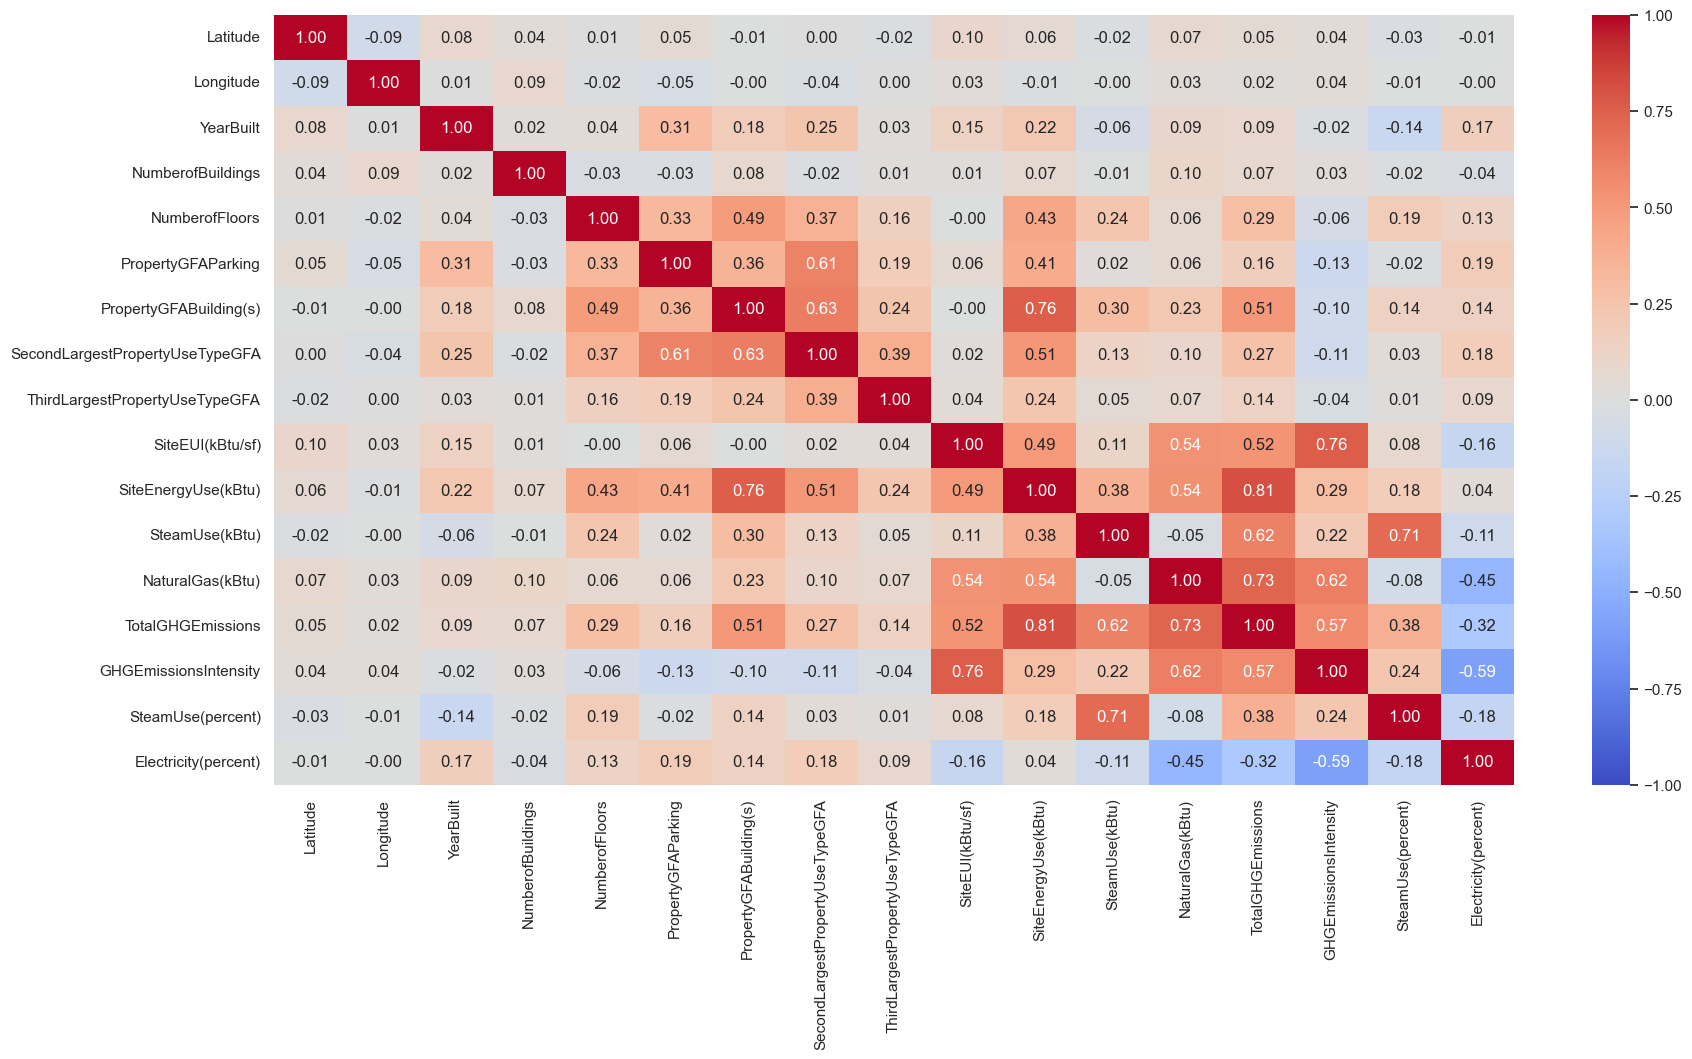

In [12]:
show_correlogram(data_cleaned)

In [13]:
data_cleaned.select(cs.numeric())

# sns.displot(data_cleaned.select(cs.numeric()))


Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SteamUse(percent),Electricity(percent)
f32,f32,u16,u8,u8,u32,u32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
47.612202,-122.33799,1927,1,12,0,88434,0.0,0.0,81.699997,7226362.5,2.003882e6,1.276453e6,249.979996,2.83,0.277302,0.54606
47.613171,-122.333931,1996,1,11,15064,88502,15064.0,4622.0,94.800003,8.387933e6,0.0,5.145082e6,295.859985,2.86,0.0,0.386609
47.61412,-122.336639,1926,1,10,0,61320,0.0,0.0,110.800003,6.794584e6,2.2144e6,1.811213e6,286.429993,4.67,0.325913,0.407519
47.61375,-122.340469,1980,1,18,62000,113580,68009.0,0.0,114.800003,1.4172606e7,0.0,8.803998e6,505.01001,2.88,0.0,0.378802
47.61623,-122.336571,1999,1,2,37198,60090,0.0,0.0,136.100006,1.2086616e7,0.0,4.715182e6,301.809998,3.1,0.0,0.609884
47.613899,-122.332832,1926,1,11,0,83008,0.0,0.0,70.800003,5.758795e6,0.0,2.94758e6,176.139999,2.12,0.0,0.48816
47.61327,-122.33136,1926,1,8,0,102761,0.0,0.0,61.299999,6298131.5,2276286.5,385189.0,221.509995,2.16,0.361423,0.577418
47.60294,-122.332626,1904,1,15,0,163984,0.0,0.0,83.699997,1.372382e7,0.0,6.4259e6,392.160004,2.39,0.0,0.53177
47.606949,-122.334137,1969,1,11,19279,133884,0.0,0.0,119.599998,1.6016644e7,5237165.5,4.59185e6,691.26001,4.51,0.326983,0.386325


In [21]:
data_completed = data_cleaned \
    .with_columns((pl.when(pl.col("SiteEnergyUse(kBtu)").log().is_infinite()).then(pl.lit(0)).otherwise(pl.col("SiteEnergyUse(kBtu)").log())).alias("SiteEnergyUse(kBtu)Log")) \
    .with_columns((pl.when(pl.col("TotalGHGEmissions").log().is_infinite()).then(pl.lit(0)).otherwise(pl.col("TotalGHGEmissions").log())).alias("TotalGHGEmissionsLog"))

data_completed.describe()


describe,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SteamUse(percent),Electricity(percent),SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1358""","""1358""","""1358""",1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,"""1358""","""1358""",1358.0,"""1358""",1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,47.615574,-122.333191,1960.121502,1.048601,3.630339,9767.541973,72693.756259,null,null,12658.420898,null,1663.835205,64.898598,4620555.5,190183.5625,1.0822e6,95.386383,1.38447,0.021522,0.709375,14.775591,3.77858
"""std""",null,null,null,0.047449,0.022996,32.609873,0.399698,4.787945,29081.136625,78888.374882,null,null,26818.240234,null,5589.97168,49.287575,5429319.5,1.051223e6,1.7945e6,136.606613,1.603237,0.092515,0.262199,1.089243,1.328062
"""min""","""Distribution C…","""98006""","""BALLARD""",47.50959,-122.411819,1900.0,1.0,1.0,0.0,17956.0,"""Adult Educatio…","""Adult Educatio…",0.0,"""Bank Branch""",0.0,4.4,106918.0,0.0,0.0,0.75,0.03,0.0,0.084121,11.579819,-0.287682
"""max""","""Worship Facili…","""98199""","""SOUTHWEST""",47.733871,-122.261803,2015.0,8.0,99.0,206597.0,706176.0,"""Worship Facili…","""Worship Facili…",197750.0,"""Vocational Sch…",84051.898438,309.0,3.702218e7,1.3556219e7,1.262546e7,1280.810059,14.94,0.766987,1.000003,17.427031,7.155249
"""median""",null,null,null,47.612331,-122.332817,1964.0,1.0,2.0,0.0,43855.0,null,null,0.0,null,0.0,52.299999,2456425.5,0.0,398666.0,45.095001,0.805,0.0,0.72522,14.714216,3.808768
"""25%""",null,null,null,47.58482,-122.342682,1929.0,1.0,1.0,0.0,27838.0,null,null,0.0,null,0.0,34.0,1.2084e6,0.0,0.0,18.870001,0.34,0.0,0.495476,14.004815,2.937574
"""75%""",null,null,null,47.64912,-122.322487,1986.0,1.0,4.0,0.0,84000.0,null,null,12622.0,null,0.0,79.0,5.662234e6,0.0,1.234288e6,111.230003,1.82,0.0,0.999999,15.54933,4.711601


In [22]:
data_completed.write_csv("./data/polars_data_cleaned.csv")